<a href="https://colab.research.google.com/github/Althaf0097/Demo/blob/main/Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#importing the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Target'] #column name
df = pd.read_csv(url, names=names) #convert it onto a dataframe


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Target                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum() #checking for null values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Target,0


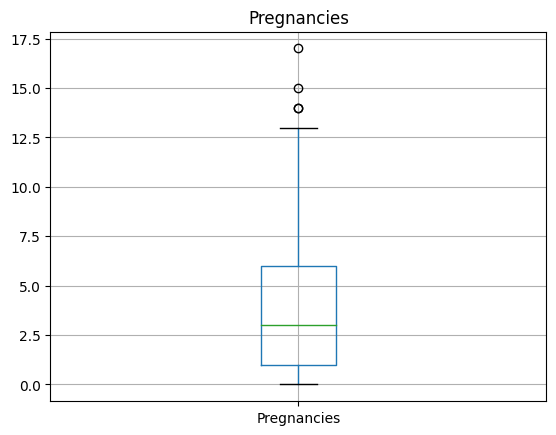

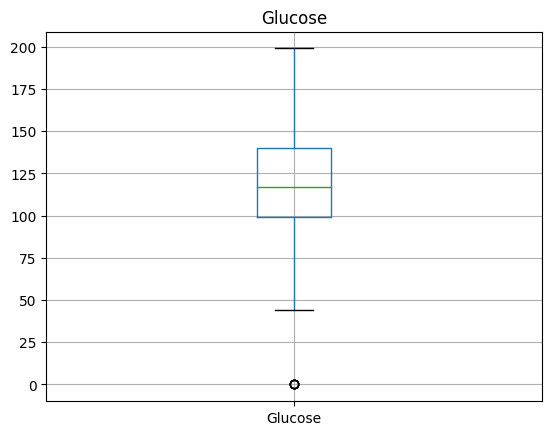

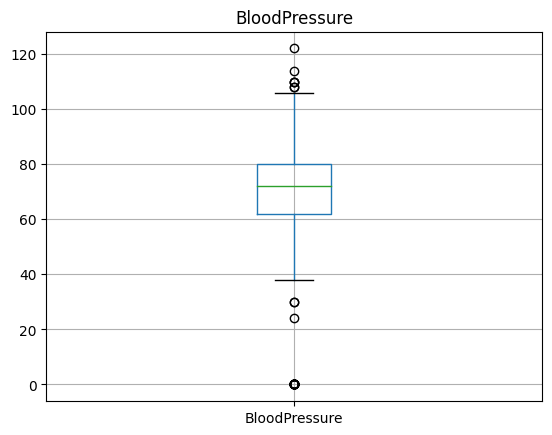

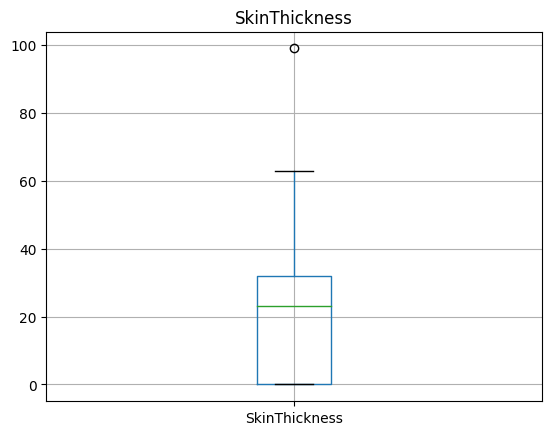

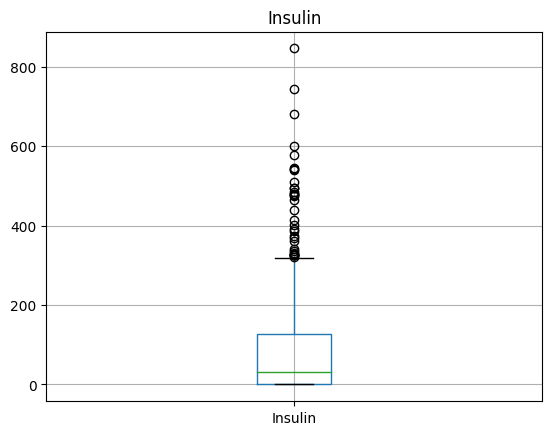

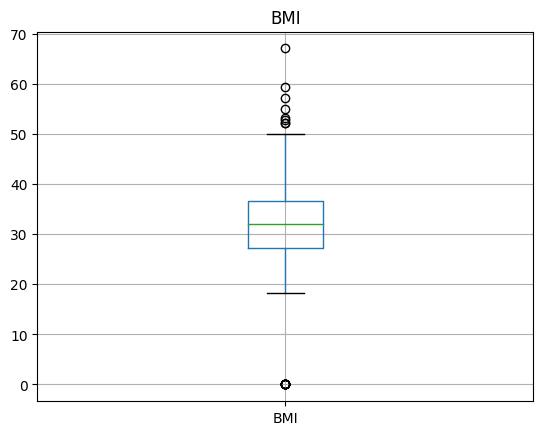

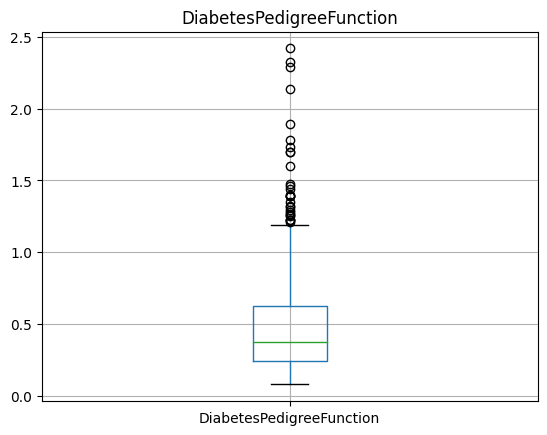

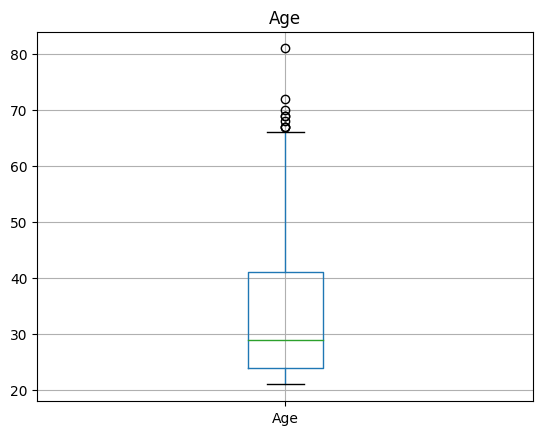

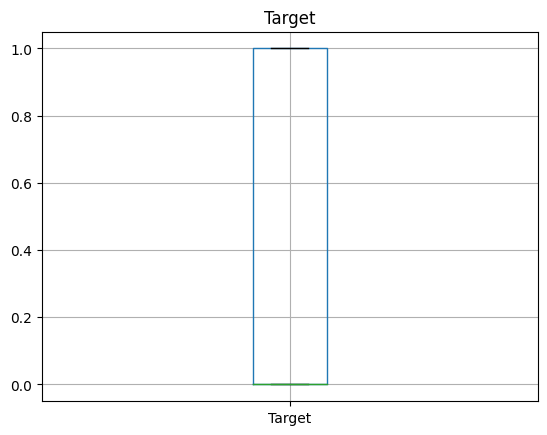

In [ ]:
#checking for outliers
for column in df.columns:
  plt.figure()
  df.boxplot([column])
  plt.title(column)

In [ ]:
#saving the column names that contain outlaires into outlier_cols
outlier_cols = []
for column in df.columns:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  count = outliers.shape[0]
  if count > 0:
    outlier_cols.append(column)
print(f'\n\nColumns that contain Outliers: {outlier_cols}')



Columns that contain Outliers: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
#handling the outliers using clipping method
for column in outlier_cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column] = df[column].clip(lower_bound, upper_bound)

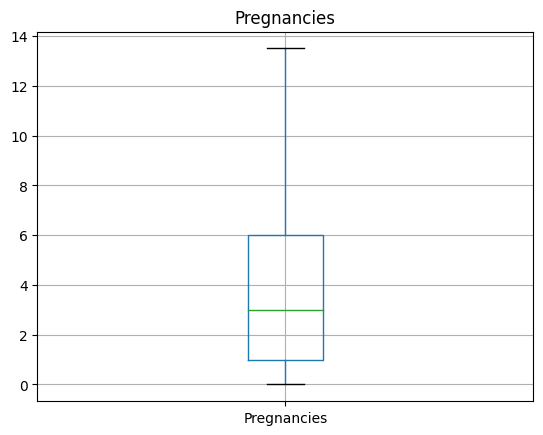

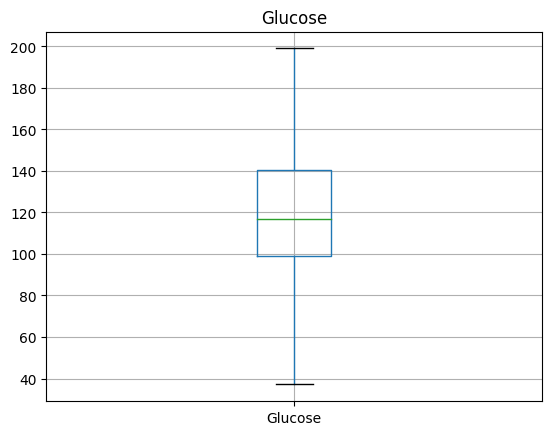

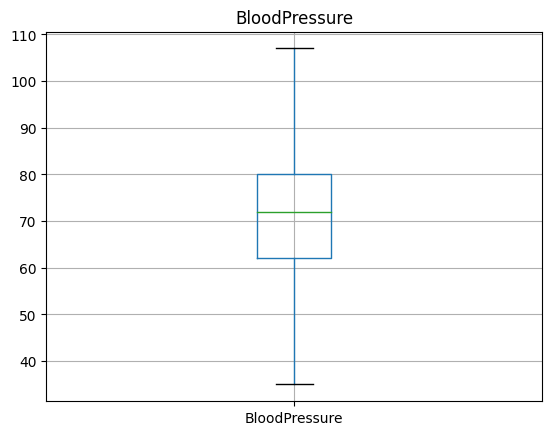

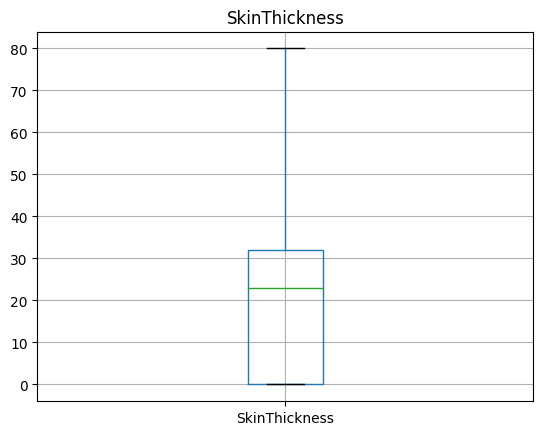

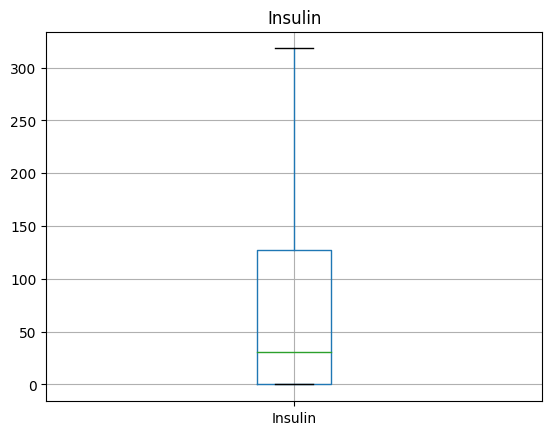

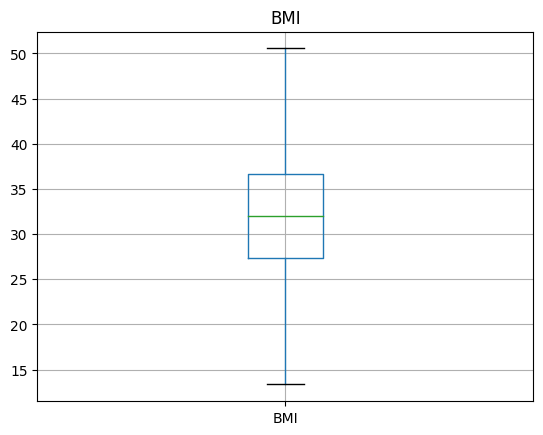

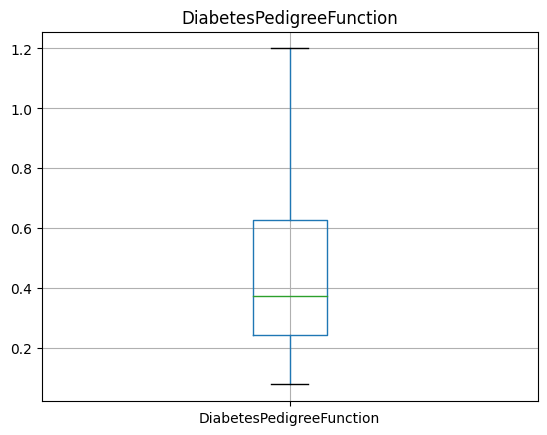

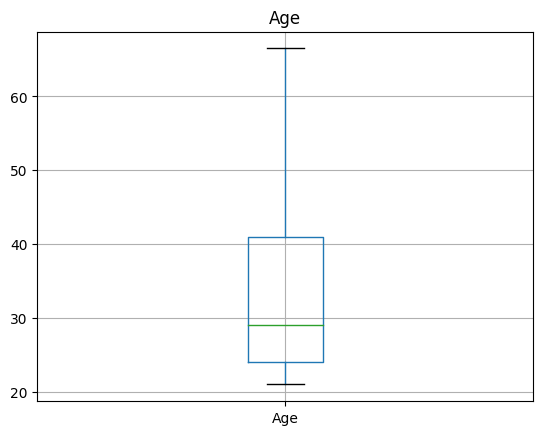

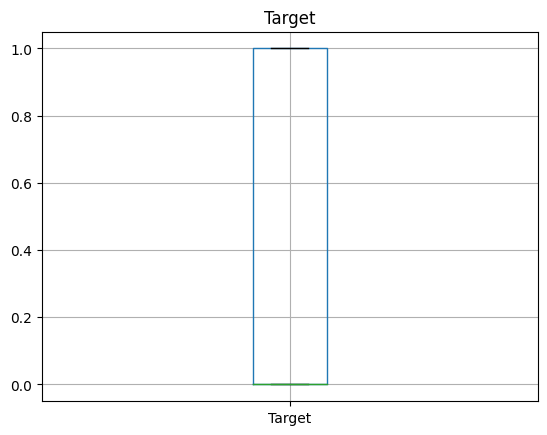

In [ ]:
for column in df.columns:
  plt.figure()
  df.boxplot([column])
  plt.title(column)

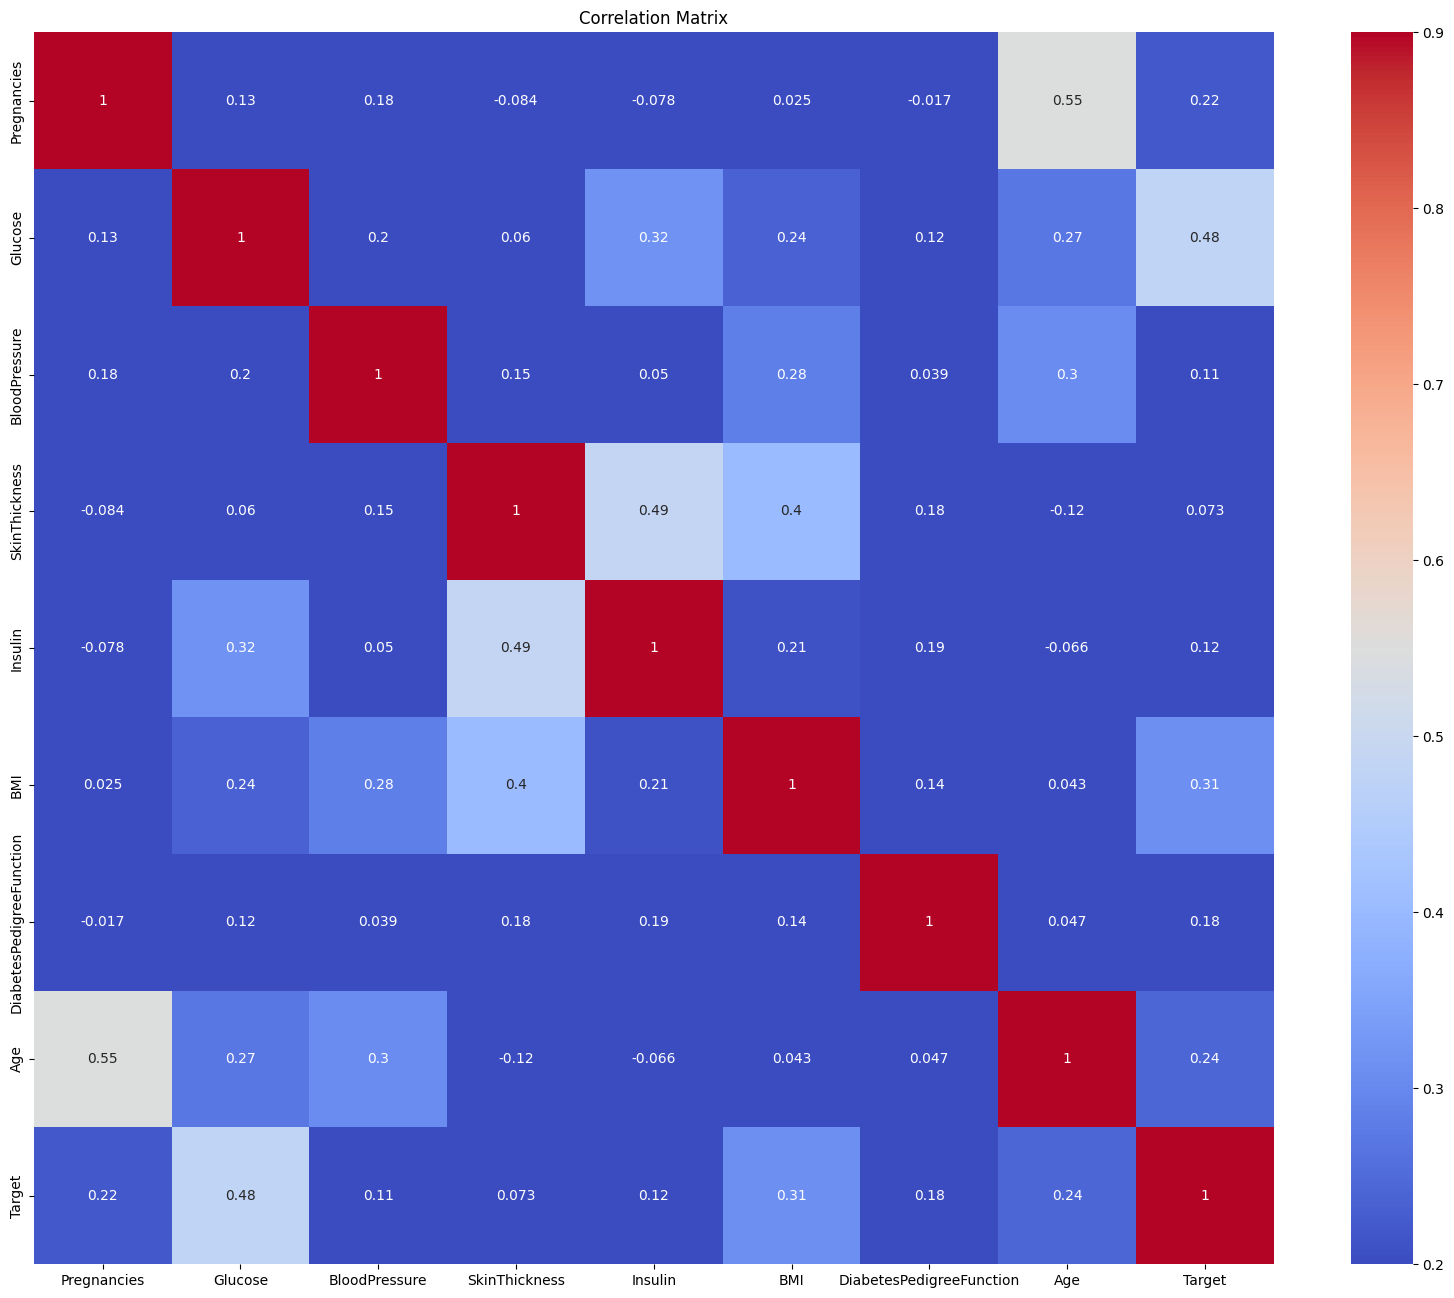

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True,vmin = 0.2,vmax=0.9, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Splitting dataset for training and testing
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



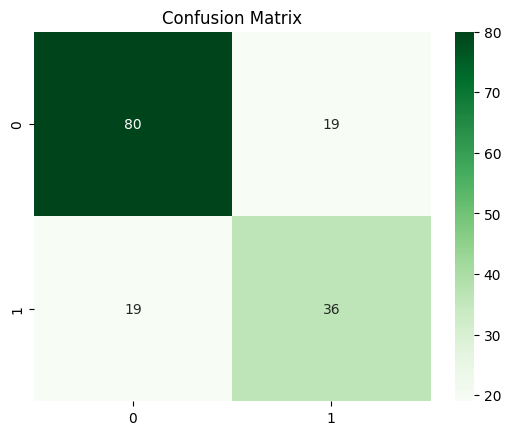

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

Logistic Regression Tuning

In [ ]:
#use gridsearch for hyperparameter tuning
#define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] #REGULARISATION STRENGTGH
              ,'penalty': ['l1', 'l2'] #type of regularisation
              ,'solver': ['liblinear', 'saga'] #SOLVER
              }
#create logistic regression object
logreg = LogisticRegression(max_iter=1000)
#perform gridsearch
grid_search = GridSearchCV(logreg, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
#print best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
best_logreg_mod = LogisticRegression(C=1,penalty='l1', solver='liblinear')
best_logreg_mod.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
best_y_pred = best_logreg_mod.predict(X_test)

In [ ]:
print(classification_report(y_test, best_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



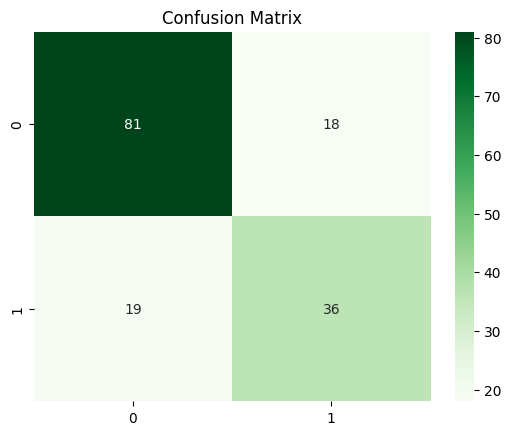

In [ ]:
conf_mat = confusion_matrix(y_test, best_y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        99
           1       0.52      0.27      0.36        55

    accuracy                           0.65       154
   macro avg       0.60      0.57      0.56       154
weighted avg       0.62      0.65      0.62       154



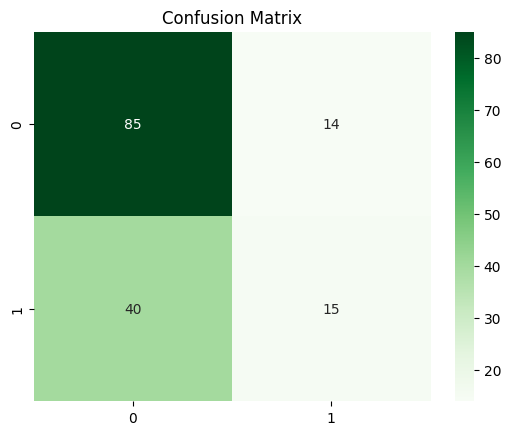

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

KNN Tuning

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=22, weights='distance', metric='euclidean')
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=22, weights='distance')

In [ ]:
knn_y_pred = best_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



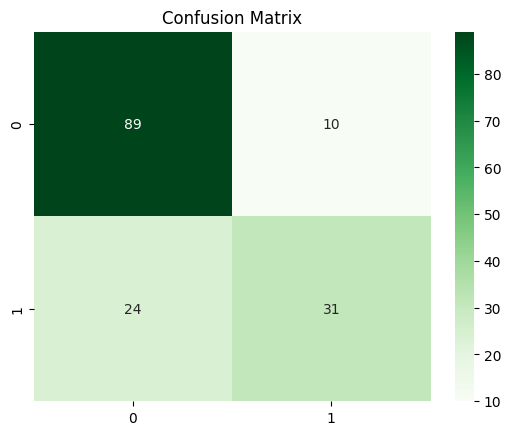

In [ ]:
conf_mat = confusion_matrix(y_test,knn_y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt_model.predict(X_test)

In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



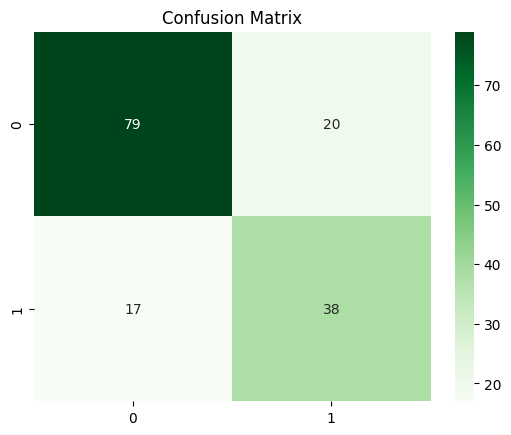

In [ ]:
conf_mat = confusion_matrix(y_test, dt_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

DecisionTree Tuning

In [ ]:
tree = DecisionTreeClassifier()

# Set up the parameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Perform grid search
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Decision Tree:", grid_search.best_params_)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
dtbest_model = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=1,min_samples_split=2)
dtbest_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
dtbest_pred = dtbest_model.predict(X_test)

In [ ]:
print(classification_report(y_test,dtbest_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



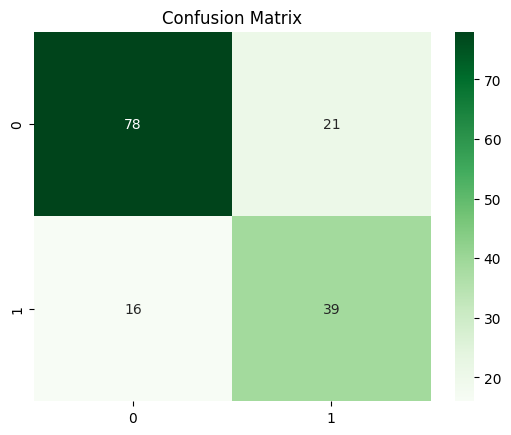

In [ ]:
conf_mat = confusion_matrix(y_test, dtbest_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [ ]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

[[77 22]
 [21 34]]


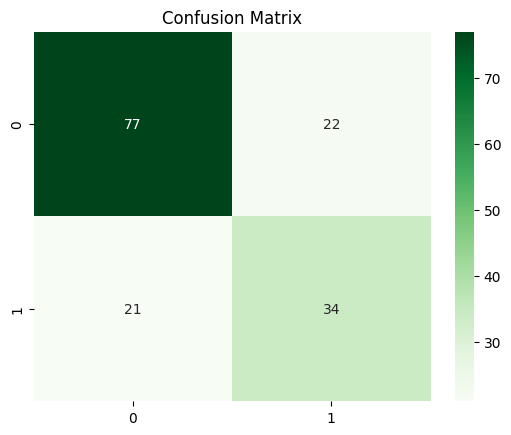

In [ ]:
conf_mat = confusion_matrix(y_test, rf_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

SVM

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
svm_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



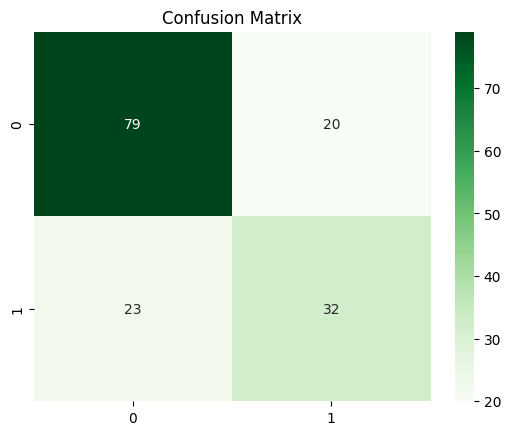

In [ ]:
conf_mat = confusion_matrix(y_test, svm_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#best model is Tuned KNN with a accuracy of 78%